<a href="https://colab.research.google.com/github/roanacla/ML_Heart_Disease_Predictor_Feature_Creation/blob/main/Copy_of_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6 - Homework 3 - Feature Transformation

## DataSet description



1.   **age** - *Age in years*
2.   **sex** - *1 = male; 0 = female*
3.   **cp** - *chest pain type (chest pain, 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)*
4.   **trestbps** - *resting blood pressure (in mm Hg on admission to the hospital)*
5.   **chol** - *serum cholestoral in mg/dl*
6.   **fbs** - *(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)*
7.   **restecg** - *resting electrocardiographic results (1 = normal, 2 = having ST-T wave abnormality, 3 = showing probable or definite left ventricular hypertrophy)*
8.   **thalach** - *maximum heart rate achieved*
9.   **exang** - *exercise induced angina (1 = yes; 0 = no)*
10.   **oldpeak** - *ST depression induced by exercise relative to rest (1 = upsloping, 2 = flat, 3 = downsloping)*
11.   **slope** - *the slope of the peak exercise ST segment(segment,1 = upsloping, 2 = flat, 3 = downsloping)*
12.   **ca** - *number of major vessels (0-3) colored by flourosopy*
13.   **thal** - *3 = normal; 6 = fixed defect; 7 = reversable defect*
14.   **target** - *have disease or not (1=yes, 0=no)*

## Load Extensions

In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold #Method to do cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
import graphviz 
import itertools
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Load Data

In [521]:
##Read data if notebook is in google drive
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [522]:
downloaded = drive.CreateFile({'id':"1_2mf4NXzVFyxuZ1QXPHpBNnHcPeGj-H5"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Heart_Disease_UCI.csv')        # replace the file name with your file

In [523]:
DATA = pd.read_csv('Heart_Disease_UCI.csv')
DATA.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Train Using SVC



In [524]:
DATA.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [525]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [526]:
# Remove duplicate rows
print(DATA.duplicated().sum()) # one found.
DATA.drop_duplicates(inplace=True)
print(DATA.shape)

1
(302, 14)


In [527]:
ratio = 0.2                               # test samples ratio

count = int(ratio * len(DATA))            # number of test samples (60)
np.random.seed(42)                        
rnd = np.random.permutation(len(DATA))    # list of random numbers from 0 to len(data)
test_idx, train_idx = rnd[:count], rnd[count:]
test, data = DATA.iloc[test_idx], DATA.iloc[train_idx]

print(data.shape, test.shape)

(242, 14) (60, 14)


In [528]:
# we will change some features to "object", so we can describe them better

categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
data_cat = data.loc[:, categorical].astype('O')
data_cat.describe(include='O')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,242,242,242,242,242,242,242,242,242
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,158,111,210,119,169,116,145,135,132


In [529]:
# In this case we are going to train using SVC
svc_model = SVC() # Support Vector Classifier
svc_model.fit(data.drop('target', axis=1), data['target'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [530]:
pred = svc_model.predict(data.drop('target', axis=1))

print('Accuracy =', accuracy_score(data['target'], pred)) #(TP + TN) / Total
print('Precision =', precision_score(data['target'], pred))#TP / (TP + FP)
print('Recall =', recall_score(data['target'], pred))#TP / (TP + FN)

Accuracy = 0.6487603305785123
Precision = 0.6312849162011173
Recall = 0.8560606060606061


## Spot new Features

In [531]:
# categorical features

cat_draw = data.loc[:, categorical]

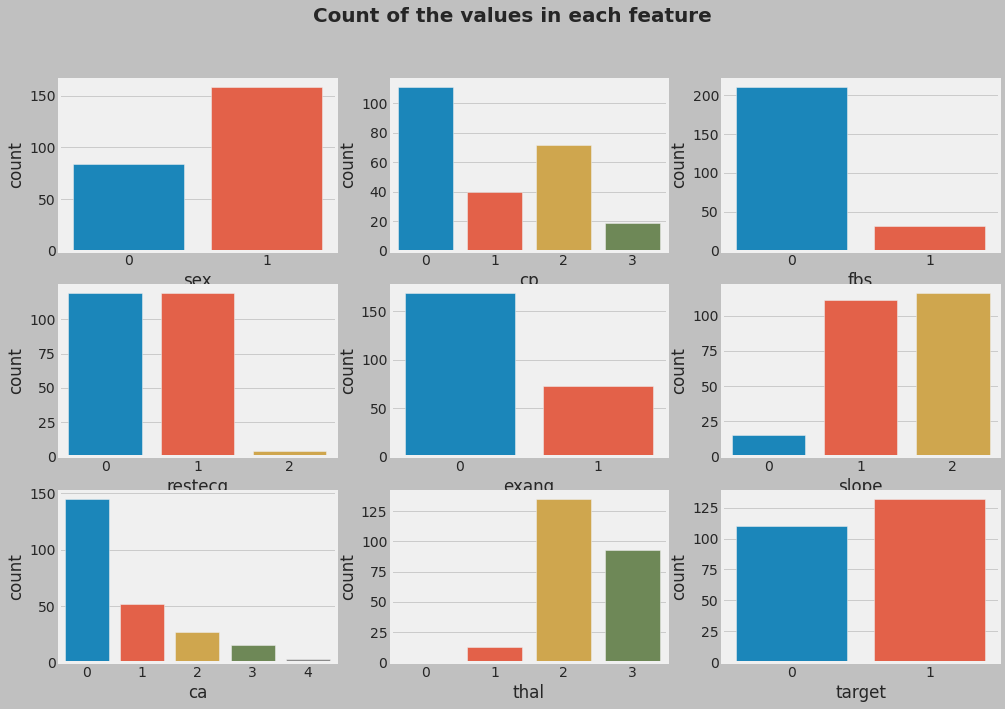

In [532]:
# count of the values in each feature

fig, ax = plt.subplots(3,3, figsize=(15,10))
plt.suptitle("Count of the values in each feature", fontsize=20, fontweight='bold')
fig.patch.set_facecolor('silver')

for i,n in enumerate(cat_draw):
    plt.subplot(3,3,i+1)
    sns.countplot(data[n])
    
# males are more than females
# small amount of people got blood sugar > 120 "fbs = 1"
# small amount of people got slope = 0
# very small amount of people got electrocardiographic(restecg) = 2
# very small amount of people got ca = 4
# very small amount of people got thal = 0
# the data is balanced "ratio of 0 to 1 in the target is good"

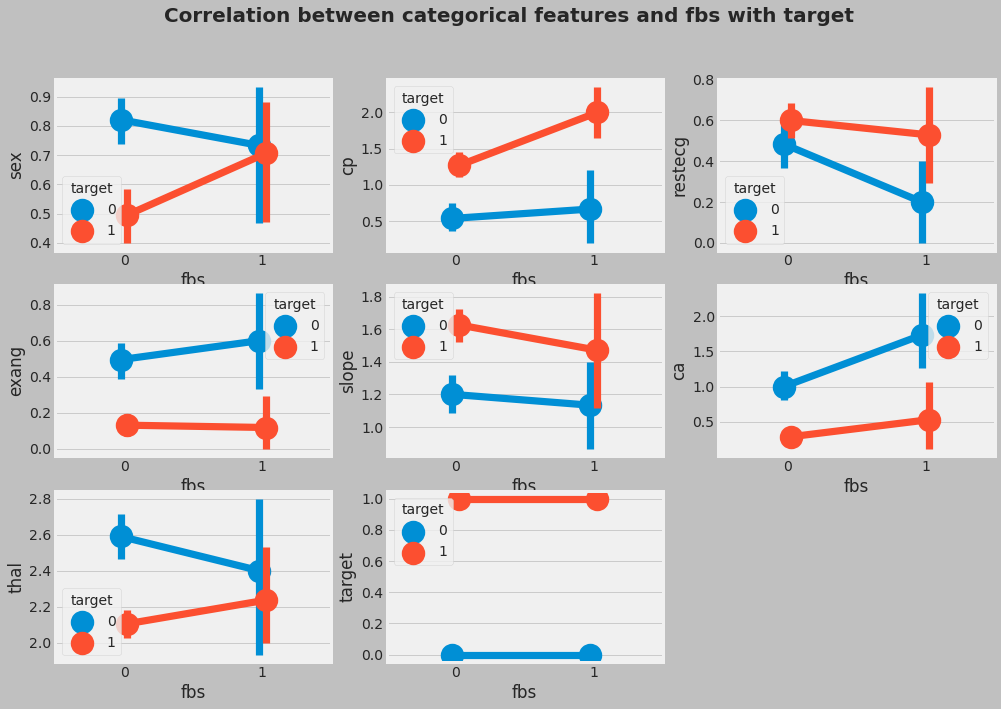

In [534]:
# correlation between categorical features and fbs with target
# let's try to create new features from it ("fbs")
cat_with_fbs = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

fig, ax = plt.subplots(3,3, figsize=(15,10))
plt.suptitle("Correlation between categorical features and fbs with target", fontsize=20, fontweight='bold')
fig.patch.set_facecolor('silver')
ax.flat[-1].set_visible(False) # to remove last plot

for i,n in enumerate(cat_with_fbs):
    plt.subplot(3,3,i+1)
    sns.pointplot(hue='target', y=n, x='fbs', data=data, kind='point', dodge=True);
    
# Because ca, cp and exang with fbs are well separated (Red line from blue line),
# is a sign that we can add more features

In [535]:
# correlation between numerical features and fbs with target

num_with_fbs = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [536]:
# Normalizing the data
# we will use StandardScaler on the data(numerical data only) 

SS = StandardScaler()
data[num_with_fbs] = SS.fit_transform(data[num_with_fbs])

In [537]:
# the distribution of the numerical features before using cbrt
# numerical features

dist_data = num_with_fbs

    
# we can see that we have right skew in chol and oldpeak so we will try to fix it by using cbrt (the 3rd root) .

### Create New features (Part 1 )





In [538]:
# fbs with "ca" "exange" and "cp"

data['ca_fbs'] = data['ca'] * data['fbs']
data['exang_fbs'] = data['exang'] * data['fbs']
data['cp_fbs'] = data['cp'] * data['fbs']

## Keep Looking For more

target,0,1
ca,,
0,38,107
1,37,15
2,22,5
3,12,3
4,1,2


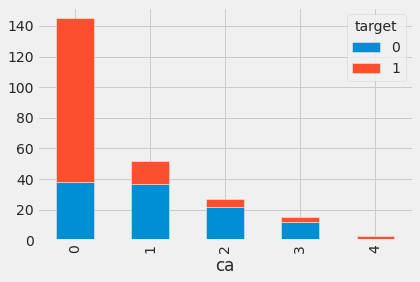

In [539]:
ca_target = pd.crosstab(data.ca, data.target)
ca_target.plot.bar(stacked=True);
ca_target

# here we can see that when ca is 0 there is more propelty for the target to be 1 
# while when ca is 1,2,3 the target Tends to be 1
# so we will create new feature

target,0,1
thal,,
0,0,1
1,9,4
2,30,105
3,71,22


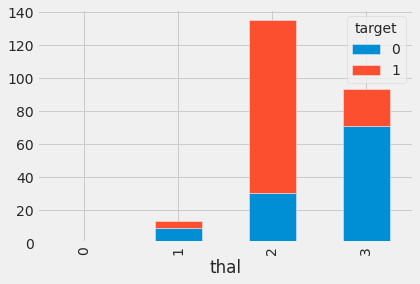

In [540]:
thal_target = pd.crosstab(data.thal, data.target)
thal_target.plot.bar(stacked=True);
thal_target

# as we said before, when thal 2 target 1, else targe 0

target,0,1
cp,,
0,79,32
1,8,32
2,16,56
3,7,12


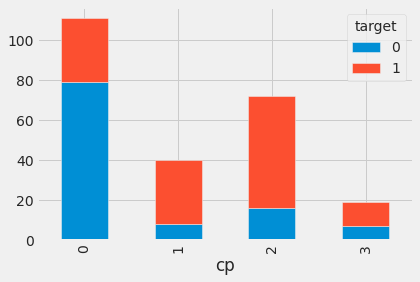

In [541]:
cp_target = pd.crosstab(data.cp, data.target)
cp_target.plot.bar(stacked=True);
cp_target

# target = 0 when cp = 0 , else target = 1  

### Create New features (Part 2)

In [542]:
data['ca_1_0'] = [1 if x==0 or x==4 else 0 for x in data.ca]
data['thal_1_0'] = [1 if x==2 or x==0 else 0 for x in data.thal]
data['cp_1_0'] = [0 if x == 0 else 1 for x in data.cp]

## Two categorical features with Slope

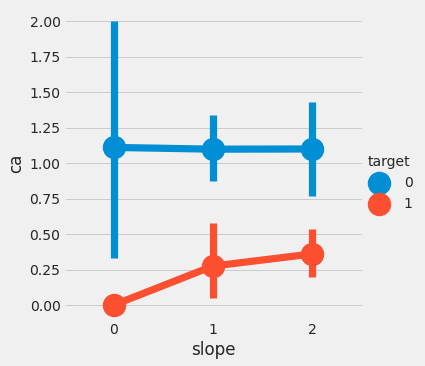

In [543]:
sns.catplot(x='slope', y='ca', data=data, hue='target', kind='point');

# you can see how target is well separated between slope and ca
# so we will create from them new feature

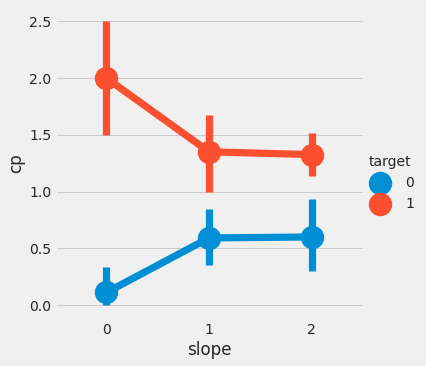

In [544]:
sns.catplot(x='slope', y='cp', data=data, hue='target', kind='point');

# new feature from slope and cp

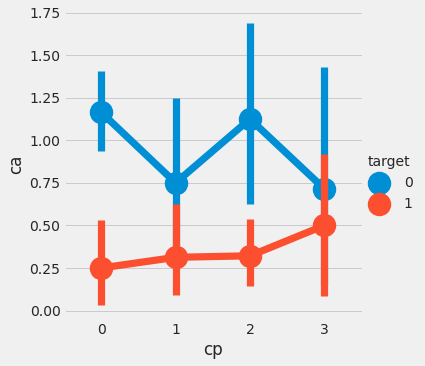

In [545]:
sns.catplot(x='cp', y='ca', data=data, hue='target', kind='point');

# here you can see that some points are overlapping with one another
# so we will not use ca with cp to create new feature

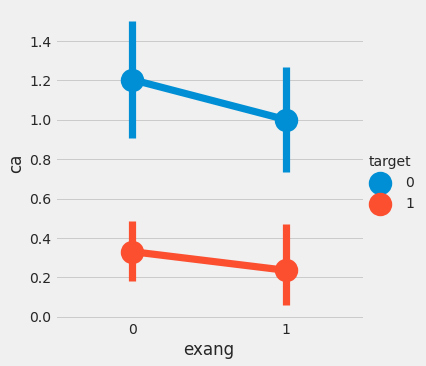

In [546]:
sns.catplot(x='exang', y='ca', data=data, hue='target', kind='point');

# new feature .

### Create New features (Part 3)

In [547]:
data['slope_ca'] = data['slope'] * data['ca']
data['slope_cp'] = data['slope'] * data['cp']
data['exang_ca'] = data['exang'] * data['ca']
data['sex_ca'] = data['sex'] * data['ca']

## Feature Selection

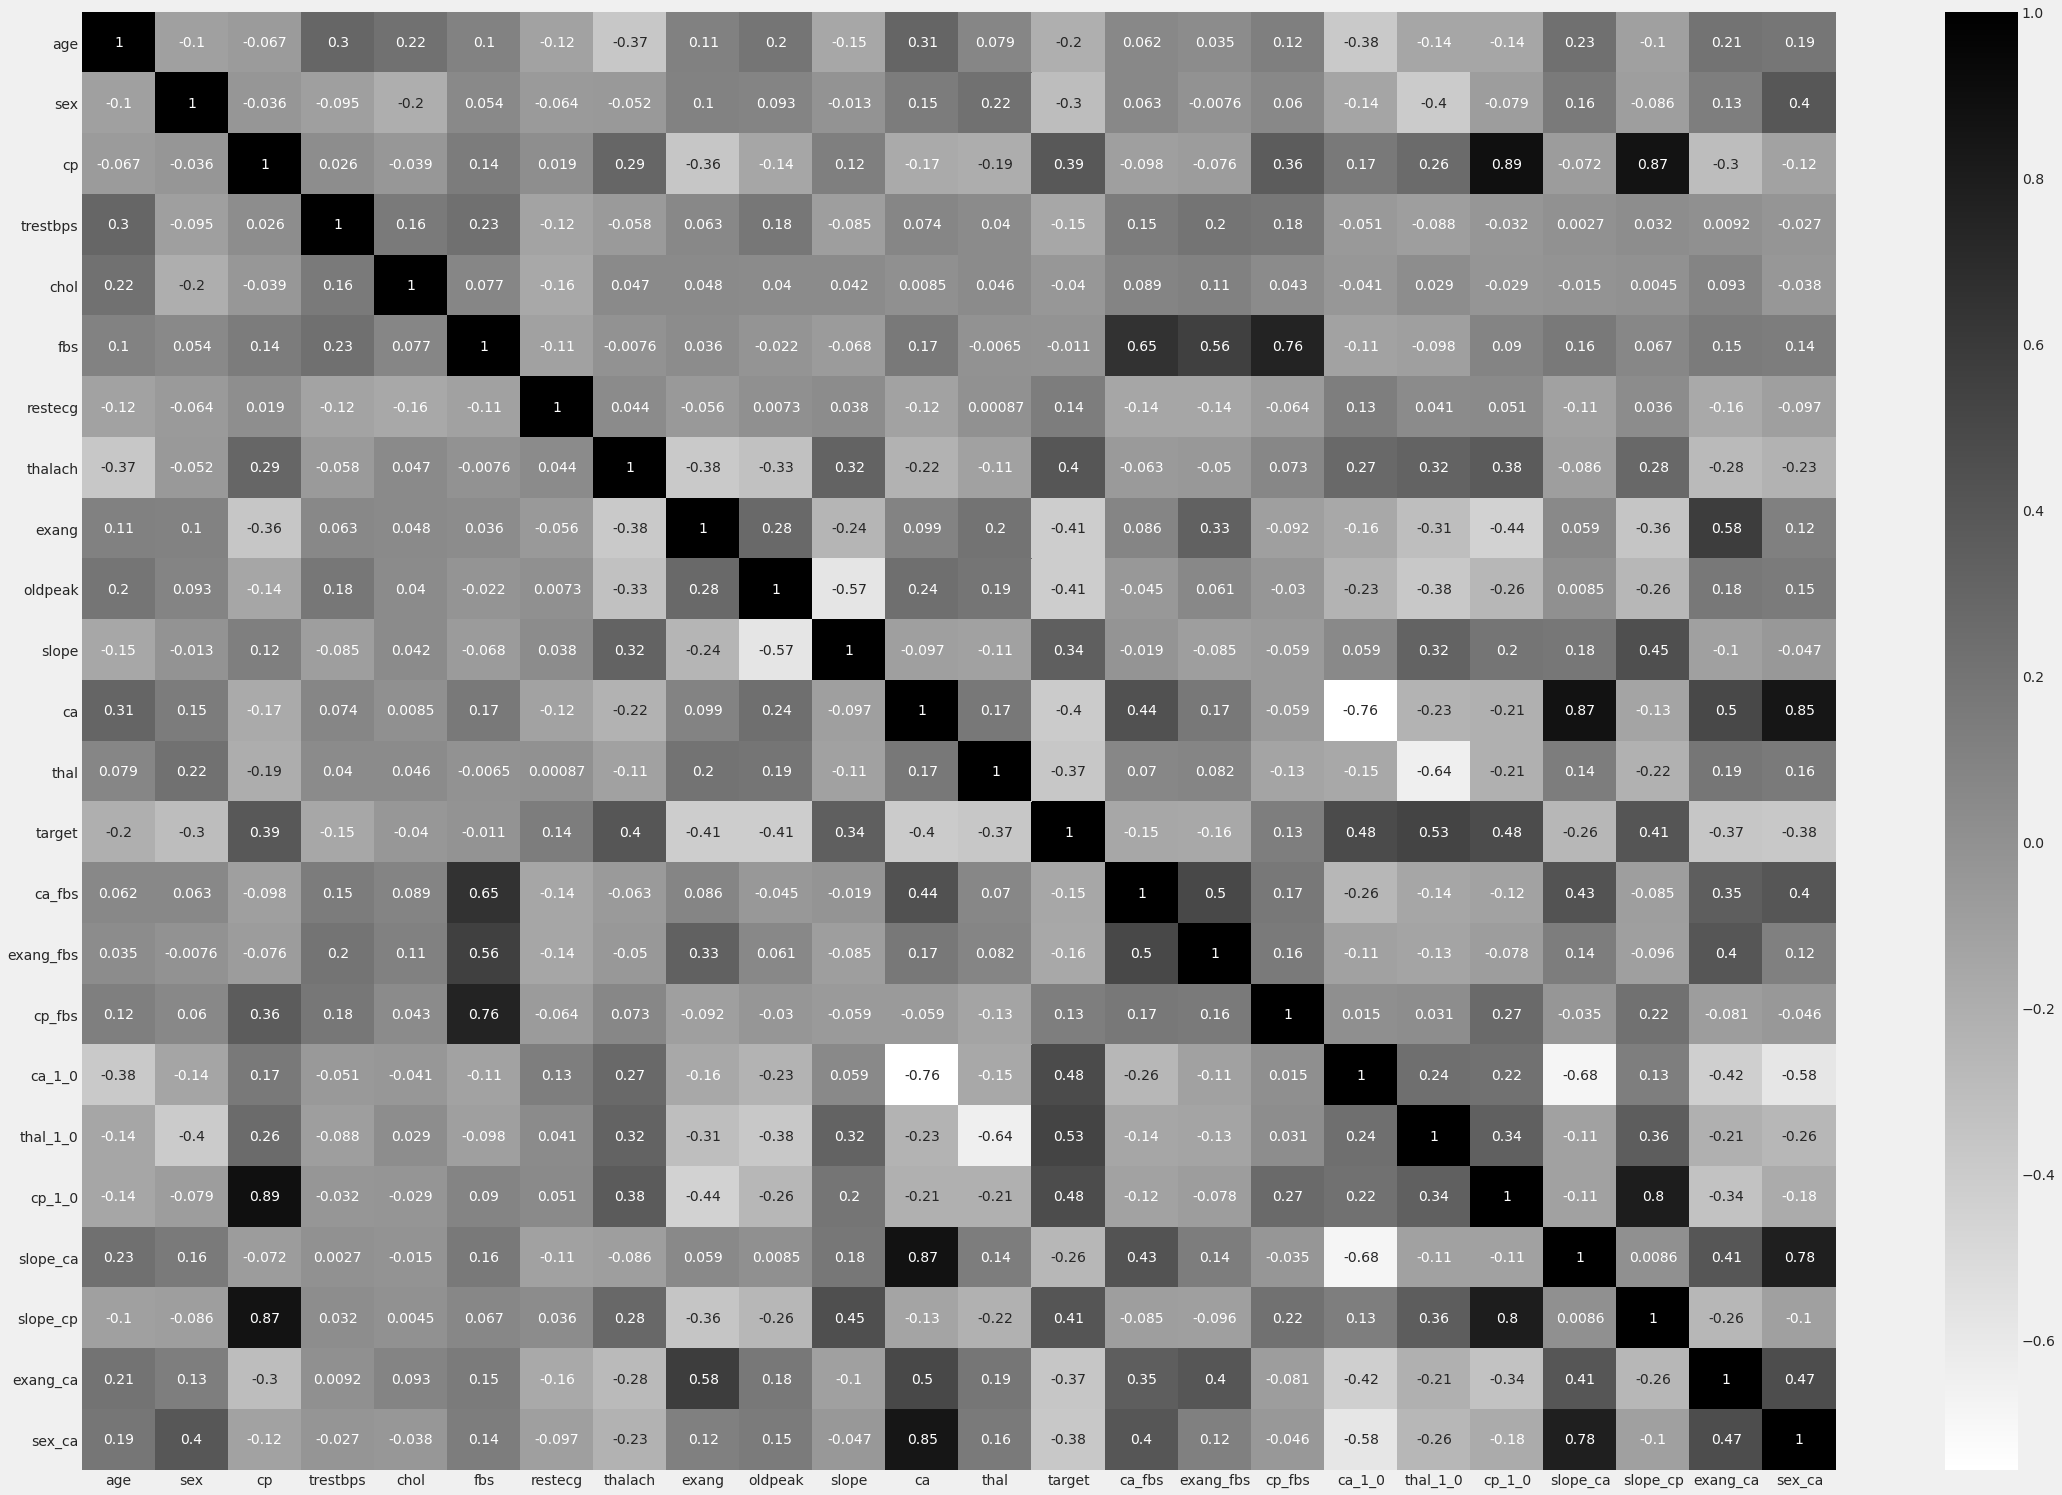

In [548]:
corr = data.corr()
plt.figure(figsize=(35,25))
sns.heatmap(corr, annot=True, cmap='binary');

# so good , most of the features we created got high corr with the target
# you can see thal_1_0 got 0.53 corr with the target, ca_1_0 and cp_1_1 got 0.48 that's better from all the features we started with

In [549]:
# let's drop some features

# features that got low corr with target and doesn't affect the accuracy will be dropped
# or that have big corr with other features

data.drop(['fbs', 'chol', 'sex','slope', 'cp', 'thalach',
           'oldpeak', 'slope_ca', 'age'], axis=1, inplace=True)

In [550]:
corr = data.corr()
plt.figure(figsize=(25,15))
# sns.heatmap(corr, annot=True, cmap='binary');


<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

## Test Accuracy, Precision and Recall

In [551]:
svc_model = SVC()
svc_model.fit(data.drop('target', axis=1), data['target'])
pred = svc_model.predict(data.drop('target', axis=1))

print('acc =', accuracy_score(data['target'], pred))
print('prec =', precision_score(data['target'], pred))
print('reca =', recall_score(data['target'], pred))

# and here is the magic :) , you can see how much better the accuracy is after adding new features
# but what if our model is overfitting , let's evaluate it using k-folds

acc = 0.8801652892561983
prec = 0.8705035971223022
reca = 0.9166666666666666


# TEST (Using logistic Regression)

In [552]:
X = data.drop('target', axis=1) #Input
y = data['target'] #Output
#Generate 70% of train input data & 30% of test input data.
#Generate 70% of train output data & 30% of test output data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Test Using Logisting regression
LR_model = LogisticRegression(solver='saga', random_state=42, max_iter=6000)
LR_model.fit(X_train, y_train)
yhat = LR_model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Logistic Regression Accuracy: %.3f' % acc) ## Improvement over Decision Tree

Logistic Regression Accuracy: 0.918


#Conslusion
The accuracy improve from from 87% to 92% using feature transformation and data enrichment.

Current Logistic Regression Accuracy: 0.918

Bellow there are the different results for accuracy using other algorithms:

```
# Decision tree accuracy: 0.802 (Postpruning to get alpha tunning parameter.)
# Logistic regression accuracy: 0.868
# Random Forest: 0.8241
```
